In [1]:
#from census import Census
#import os 

# Get Api key from user env
#c_apikey = os.environ.get("CENSUS_APIKEY")

#if c_apikey:
    #c = Census(c_apikey)
#else:
    #print("User did not set CENSUS_APIKEY in their environment")

In [2]:
# Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.cluster import HDBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



In [3]:
# Define the list of DMV counties and cities
dmv_areas = [
    "Loudoun County, Virginia",
    "Falls Church City, Virginia",
    "Alexandria City, Virginia",
    "Fairfax County, Virginia",
    "District of Columbia",
    "Fairfax City, Virginia",
    "Montgomery County, Maryland",
    "Prince William County, Virginia",
    "Prince Georges County, Maryland",
    "Arlington County, Virginia",
    "Calvert County, Maryland",
    "Charles County, Maryland",
    "Frederick County, Maryland",
    "Stafford County, Virginia",
    "Manassas City, Virginia",
    "Manassas Park City, Virginia",
    "Clark County, Virginia",
    "Fauquier County, Virginia",
    "Spotsylvania County, Virginia",
    "Warren County, Virginia",
    "Fredericksburg City, Virginia",
    "Jefferson County, West Virginia",
]

# Define file paths
file1 = "colonoscopy.csv"
file2 = "household_income.csv"
file3 = "SVI_index.csv"
file4 = "college_educated.csv"
file5 = "pap_smear.csv"

# Load the datasets, specifying headers where applicable
#data1 = pd.read_csv(file1, header=None, on_bad_lines="skip")
#kdata1.columns = ["County", "FIPS", "Model-Based Percent(3)", "Lower 95% Confidence Interval", "Upper 95% Confidence Interval"]

#data2 = pd.read_csv(file2, on_bad_lines="skip")
#data2.columns = ["County", "FIPS", "Rural-Urban Continuum", "Value (Dollars)", "Rank within US"]

#data3 = pd.read_csv(file3, on_bad_lines="skip")
#data3.columns = ["County", "FIPS", "Rural-Urban Continuum", "Value (Index)"]

#data4 = pd.read_csv(file4, on_bad_lines="skip")
#data4.columns = [ "County", "FIPS", "Rural-Urban Continuum", "Value (Percent)", "People (Education: At Least Bachelor's Degree)", "Rank within US", ]

#data5 = pd.read_csv(file5, header=None, on_bad_lines="skip")
#data5.columns = ["County", "FIPS", "Model-Based Percent(3)", "Lower 95% Confidence Interval", "Upper 95% Confidence Interval"]

data1 = pd.read_csv(file1, header=0)
data1.columns = ["County", "FIPS", "Model-Based Percent-colonoscopy", "Lower 95% Confidence Interval-colonoscopy", "Upper 95% Confidence Interval-colonoscopy"]
data2 = pd.read_csv(file2, header=0)
data2.columns = ["County", "FIPS", "Rural-Urban Continuum", "Value (Dollars)", "Rank within US"]
data3 = pd.read_csv(file3, header=0)
data3.columns = ["County", "FIPS", "Rural-Urban Continuum", "Value (Index)"]
data4 = pd.read_csv(file4, header=0)
data4.columns = ["County", "FIPS", "Rural-Urban Continuum", "Value (Percent)", "People (Education: At Least Bachelor's Degree)", "Rank within US"]
data5 = pd.read_csv(file5, header=0)
data5.columns = ["County", "FIPS", "Model-Based Percent-pap_smear", "Lower 95% Confidence Interval-pap_smear", "Upper 95% Confidence Interval-pap_smear"]

# Filter data for DMV counties and cities
filtered_data1 = data1[data1["County"].isin(dmv_areas)]
filtered_data2 = data2[data2["County"].isin(dmv_areas)]
filtered_data3 = data3[data3["County"].isin(dmv_areas)]
filtered_data4 = data4[data4["County"].isin(dmv_areas)]
filtered_data5 = data5[data5["County"].isin(dmv_areas)]

# Drop FIPS column 
filtered_data1 = filtered_data1.drop(columns=["FIPS"])
filtered_data2 = filtered_data2.drop(columns=["FIPS"])
filtered_data3 = filtered_data3.drop(columns=["FIPS"])
filtered_data4 = filtered_data4.drop(columns=["FIPS"])
filtered_data5 = filtered_data5.drop(columns=["FIPS"])

# Merge all datasets on the 'County' column (no FIPS)
#merged_data = pd.merge(filtered_data1, filtered_data2, on="County", how="inner")
#merged_data = pd.merge(merged_data, filtered_data3, on="County", how="inner")
#merged_data = pd.merge(merged_data, filtered_data4, on="County", how="inner")
#merged_data = pd.merge(merged_data, filtered_data5, on="County", how="inner")

# Merge all four datasets on the 'County' column
merged_data = pd.merge(filtered_data1, filtered_data2, on="County", how="inner")
filtered_data_a = [filtered_data3, filtered_data4, filtered_data5]
for i in range(len(filtered_data_a)):
    merged_data = pd.merge(merged_data, filtered_data_a[i], on="County", how="inner", suffixes=(f'_x{i}', f'_y{i}'))
    
# Save the merged data to a new CSV file
output_file = "merged_dmv_data.csv"
merged_data.to_csv(output_file, index=False)

print(f"Merged data saved to {output_file}")



Merged data saved to merged_dmv_data.csv


In [4]:
#Processsing
df = pd.read_csv('merged_dmv_data.csv', na_values='data not available')

# Selecting relevant columns for clustering (e.g., excluding FIPS and County)
#"Model-Based Percent(3)",
columns_for_clustering = [
    "Model-Based Percent-colonoscopy",
    "Model-Based Percent-pap_smear",
    "Value (Dollars)",
    "Value (Index)",
    "Value (Percent)"
]
df_cluster = df[columns_for_clustering]

nan_count = df.isna().sum()
print("Missing data")
print(nan_count)
print(df_cluster.dtypes)
# Handle missing values by filling them with the mean (you can choose a different method)
df_cluster = df_cluster.fillna(df_cluster.mean())

# Standardize the data (important for K-Means clustering)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cluster)


Missing data
County                                            0
Model-Based Percent-colonoscopy                   0
Lower 95% Confidence Interval-colonoscopy         0
Upper 95% Confidence Interval-colonoscopy         0
Rural-Urban Continuum_x0                          0
Value (Dollars)                                   0
Rank within US_x1                                 0
Rural-Urban Continuum_y0                          0
Value (Index)                                     0
Rural-Urban Continuum                             0
Value (Percent)                                   0
People (Education: At Least Bachelor's Degree)    0
Rank within US_y1                                 0
Model-Based Percent-pap_smear                     0
Lower 95% Confidence Interval-pap_smear           0
Upper 95% Confidence Interval-pap_smear           0
dtype: int64
Model-Based Percent-colonoscopy    float64
Model-Based Percent-pap_smear      float64
Value (Dollars)                    float64
Value (Index)

/home/ryan/miniconda3/envs/NOVA-Economics-on-Individual-Health/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


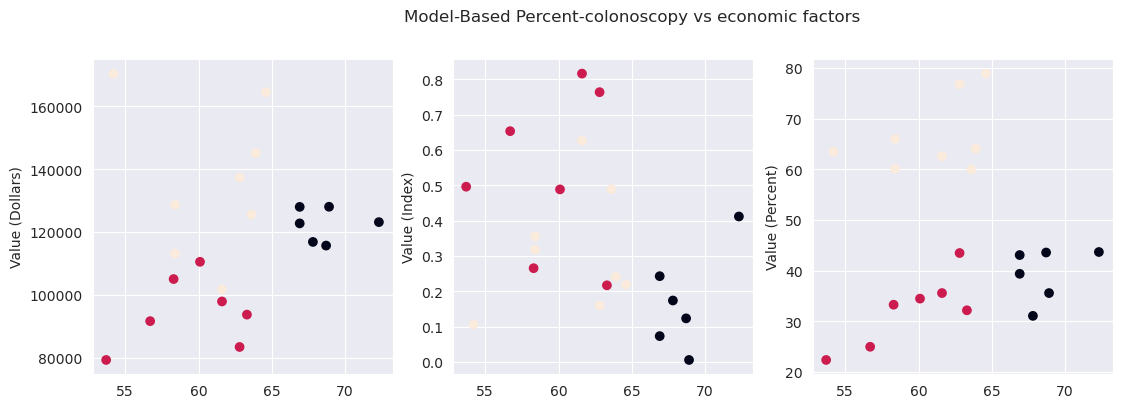

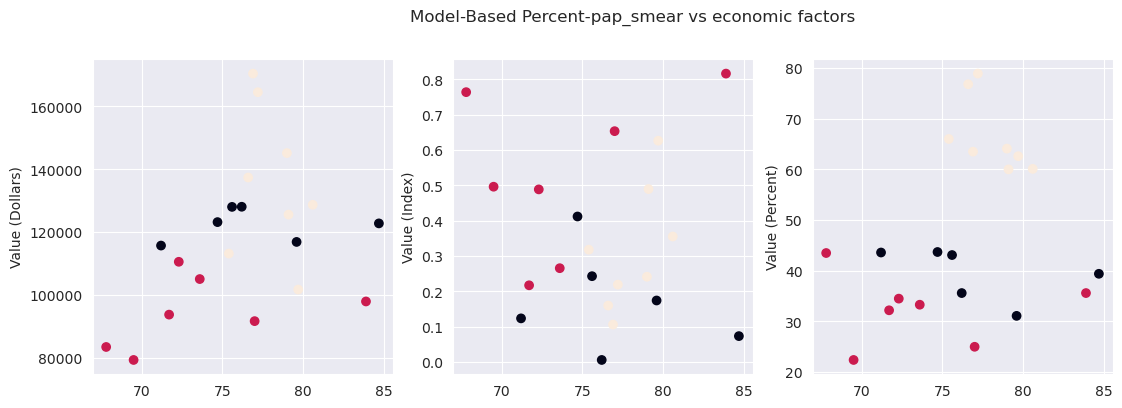

Clustering complete. The data has been saved to 'clustered_dmv_counties.csv'.


In [5]:
#Clustering Based on All Features 
#
# K-Means Clustering (adjust the number of clusters as needed)
#kmeans = KMeans(n_clusters=3, random_state=42)  # You can try different values for n_clusters
#df['Cluster'] = kmeans.fit_predict(df_scaled)
#
## Visualize the clusters (optional)
#plt.figure(figsize=(8, 6))
#plt.scatter(df['Model-Based Percent(3)_y'], df['Model-Based Percent(3)_x'], df['Value (Dollars)'], c=df['Cluster'], cmap='viridis')
#plt.xlabel('Model-Based Percent(3)_y')
#plt.ylabel('Value (Dollars)')
#plt.title('Clustering DMV Counties')
#plt.colorbar(label='Cluster')
#plt.show()
#
## Save the clustered data to a new file
#df.to_csv('clustered_dmv_counties.csv', index=False)
#
#print("Clustering complete. The data has been saved to 'clustered_dmv_counties.csv'.")

# K-Means Clustering (adjust the number of clusters as needed)
kmeans = KMeans(n_clusters=3, random_state=42)  # You can try different values for n_clusters
df['Cluster'] = kmeans.fit_predict(df_scaled)

# Visualize the clusters (optional)
#plt.figure(figsize=(8, 6))
#plt.scatter( df['Model-Based Percent-colonoscopy'], df['Value (Dollars)'], c=df['Cluster'], cmap='viridis')
#plt.xlabel('Model-Based Percent-colonoscopy')
#plt.ylabel('Value (Dollars)')
#plt.title('Clustering DMV Counties')
#plt.colorbar(label='Cluster')
#plt.show()

fig, ax = plt.subplots(1,3, figsize=(12,5))
plt.subplots_adjust(left=0.05, bottom=0.25)
plt.suptitle("Model-Based Percent-colonoscopy vs economic factors")
ax[0].scatter(df['Model-Based Percent-colonoscopy'], df['Value (Dollars)'], c=df['Cluster'])
ax[0].set_ylabel('Value (Dollars)')
ax[1].scatter(df['Model-Based Percent-colonoscopy'], df['Value (Index)'], c=df['Cluster'])
ax[1].set_ylabel('Value (Index)')
ax[2].scatter(df['Model-Based Percent-colonoscopy'], df['Value (Percent)'], c=df['Cluster'])
ax[2].set_ylabel('Value (Percent)')
plt.show()

fig2, ax = plt.subplots(1,3, figsize=(12,5))
plt.subplots_adjust(left=0.05, bottom=0.25)
plt.suptitle("Model-Based Percent-pap_smear vs economic factors")
ax[0].scatter(df['Model-Based Percent-pap_smear'], df['Value (Dollars)'], c=df['Cluster'])
ax[0].set_ylabel('Value (Dollars)')
ax[1].scatter(df['Model-Based Percent-pap_smear'], df['Value (Index)'], c=df['Cluster'])
ax[1].set_ylabel('Value (Index)')
ax[2].scatter(df['Model-Based Percent-pap_smear'], df['Value (Percent)'], c=df['Cluster'])
ax[2].set_ylabel('Value (Percent)')

plt.show()



# Save the clustered data to a new file
df.to_csv('clustered_dmv_counties.csv', index=False)

print("Clustering complete. The data has been saved to 'clustered_dmv_counties.csv'.")



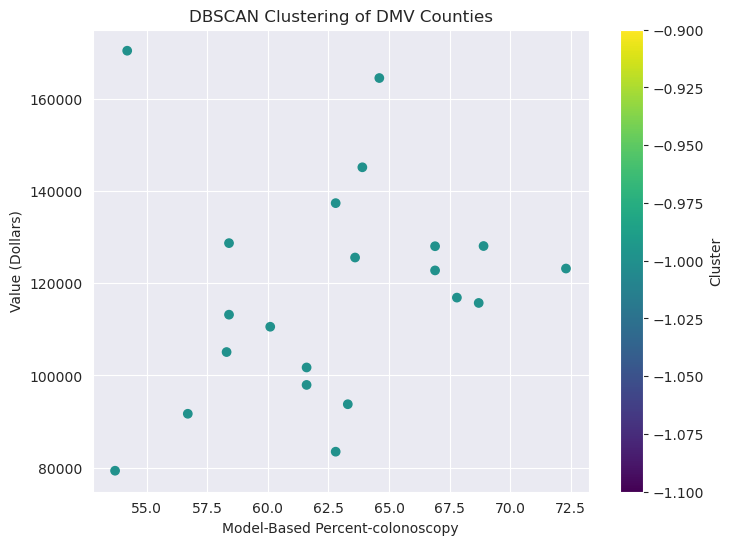

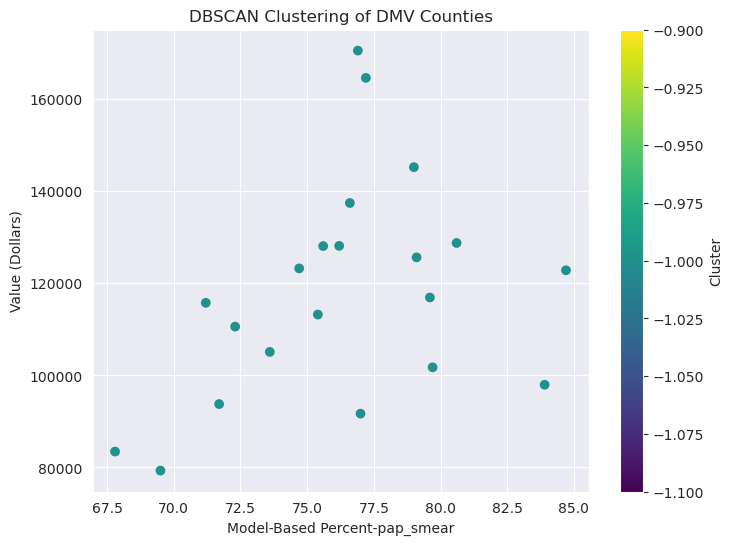

DBSCAN clustering complete. The data has been saved to 'dbscan_clustered_dmv_counties.csv'.


In [6]:
#import pandas as pd
#from sklearn.preprocessing import StandardScaler
#from sklearn.cluster import DBSCAN
#import matplotlib.pyplot as plt
#
## Load the merged data (from previous step)
#df = pd.read_csv('merged_dmv_data.csv')
#
## Selecting relevant columns for clustering (e.g., excluding FIPS and County)
#columns_for_clustering = [
#    "Model-Based Percent(3)_y",
#    "Model-Based Percent(3)_x",
#    "Value (Dollars)",
#    "Value (Index)",
#    "Value (Percent)"
#]
#df_cluster = df[columns_for_clustering]
#
## Handle missing values by filling them with the mean (you can choose a different method)
#df_cluster = df_cluster.fillna(df_cluster.mean())
#
## Standardize the data (important for DBSCAN clustering)
#scaler = StandardScaler()
#df_scaled = scaler.fit_transform(df_cluster)
#
## DBSCAN Clustering (adjust eps and min_samples as needed)
#dbscan = DBSCAN(eps=0.5, min_samples=2)  # eps is the maximum distance between two samples, min_samples is the minimum number of points to form a cluster
#df['DBSCAN_Cluster'] = dbscan.fit_predict(df_scaled)
#
## Visualize the clusters
#plt.figure(figsize=(8, 6))
#
## Plot DBSCAN clustering result
#plt.scatter(df['Model-Based Percent(3)_y'], df['Model-Based Percent(3)_x'], df['Value (Dollars)'], c=df['DBSCAN_Cluster'], cmap='viridis', marker='o')
#plt.xlabel('Model-Based Percent(3)')
#plt.ylabel('Value (Dollars)')
#plt.title('DBSCAN Clustering of DMV Counties')
#plt.colorbar(label='Cluster')
#plt.show()
#
## Save the clustered data to a new file
#df.to_csv('dbscan_clustered_dmv_counties.csv', index=False)
#
#print("DBSCAN clustering complete. The data has been saved to 'dbscan_clustered_dmv_counties.csv'.")

# DBSCAN Clustering (adjust eps and min_samples as needed)
dbscan = DBSCAN(eps=0.5, min_samples=2)  # eps is the maximum distance between two samples, min_samples is the minimum number of points to form a cluster
df['DBSCAN_Cluster'] = dbscan.fit_predict(df_scaled)

# Visualize the clusters
plt.figure(figsize=(8, 6))

# Plot DBSCAN clustering result
plt.scatter(df['Model-Based Percent-colonoscopy'], df['Value (Dollars)'], c=df['DBSCAN_Cluster'], cmap='viridis', marker='o')
plt.xlabel('Model-Based Percent-colonoscopy')
plt.ylabel('Value (Dollars)')
plt.title('DBSCAN Clustering of DMV Counties')
plt.colorbar(label='Cluster')
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(df['Model-Based Percent-pap_smear'], df['Value (Dollars)'], c=df['DBSCAN_Cluster'], cmap='viridis', marker='o')
plt.xlabel('Model-Based Percent-pap_smear')
plt.ylabel('Value (Dollars)')
plt.title('DBSCAN Clustering of DMV Counties')
plt.colorbar(label='Cluster')
plt.show()
# Save the clustered data to a new file
df.to_csv('dbscan_clustered_dmv_counties.csv', index=False)

print("DBSCAN clustering complete. The data has been saved to 'dbscan_clustered_dmv_counties.csv'.")



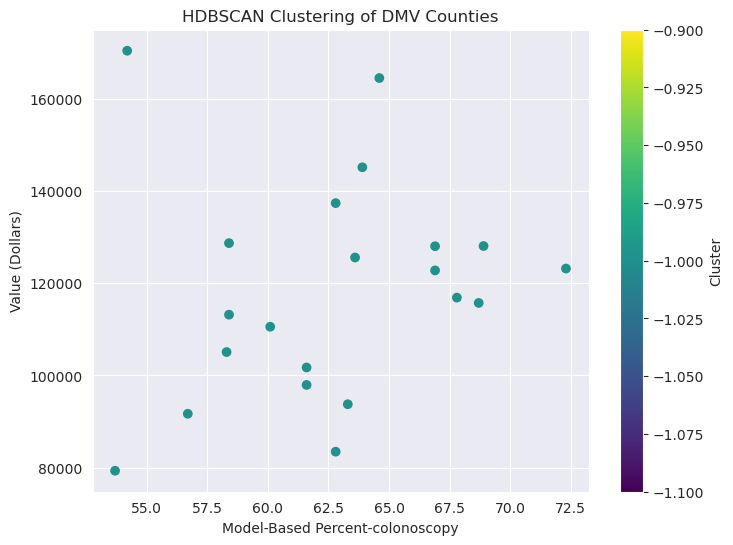

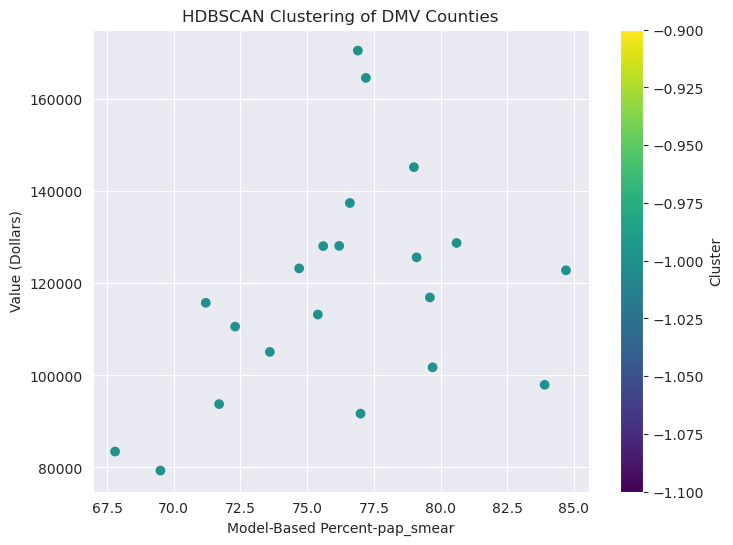

HDBSCAN clustering complete. The data has been saved to 'dbscan_clustered_dmv_counties.csv'.


In [7]:

# HDBSCAN Clustering (adjust eps and min_samples as needed)
# Thought it would be interesting to see HDBSCAN as well since it's supposed to be better at dealing with noise. But looks like we need a lot more data to make a difference
dbscan = HDBSCAN(min_cluster_size=5)
df['HDBSCAN_Cluster'] = dbscan.fit_predict(df_scaled)

# Visualize the clusters
plt.figure(figsize=(8, 6))

# Plot HDBSCAN clustering result
plt.scatter(df['Model-Based Percent-colonoscopy'], df['Value (Dollars)'], c=df['HDBSCAN_Cluster'], cmap='viridis', marker='o')
plt.xlabel('Model-Based Percent-colonoscopy')
plt.ylabel('Value (Dollars)')
plt.title('HDBSCAN Clustering of DMV Counties')
plt.colorbar(label='Cluster')
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(df['Model-Based Percent-pap_smear'], df['Value (Dollars)'], c=df['HDBSCAN_Cluster'], cmap='viridis', marker='o')
plt.xlabel('Model-Based Percent-pap_smear')
plt.ylabel('Value (Dollars)')
plt.title('HDBSCAN Clustering of DMV Counties')
plt.colorbar(label='Cluster')
plt.show()
# Save the clustered data to a new file
df.to_csv('dbscan_clustered_dmv_counties.csv', index=False)

print("HDBSCAN clustering complete. The data has been saved to 'dbscan_clustered_dmv_counties.csv'.")


In [8]:
# Load the CSV file into a DataFrame
df = pd.read_csv('merged_dmv_data.csv')

# Display the first few rows to confirm successful loading
print(df.head())


                            County  Model-Based Percent-colonoscopy  \
0  Prince William County, Virginia                             72.3   
1         Calvert County, Maryland                             68.9   
2       Frederick County, Maryland                             68.7   
3         Charles County, Maryland                             67.8   
4        Fauquier County, Virginia                             66.9   

   Lower 95% Confidence Interval-colonoscopy  \
0                                       63.8   
1                                       58.5   
2                                       59.2   
3                                       58.2   
4                                       54.5   

   Upper 95% Confidence Interval-colonoscopy Rural-Urban Continuum_x0  \
0                                       80.4                    Urban   
1                                       79.2                    Urban   
2                                       78.3                    U

In [9]:
# Disparities by Education 

# Filter relevant columns
#education_disparities = df[['County', 'Value (Percent)', 'Model-Based Percent(3)_x', 'Model-Based Percent(3)_y']]
education_disparities = df[['County', 'Value (Percent)', 'Model-Based Percent-colonoscopy', 'Model-Based Percent-pap_smear']]

# Rename columns for clarity
education_disparities.columns = ['County', 'Education Level (%)', 'Health Screening 1 (%)', 'Health Screening 2 (%)']

# Calculate disparities
education_disparities['Disparity (Screening 1)'] = education_disparities['Health Screening 1 (%)'] - education_disparities['Education Level (%)']
education_disparities['Disparity (Screening 2)'] = education_disparities['Health Screening 2 (%)'] - education_disparities['Education Level (%)']

# Display top counties with highest disparities
top_disparities = education_disparities.sort_values(by='Disparity (Screening 1)', ascending=False)
print(top_disparities.head(10))


                             County  Education Level (%)  \
3          Charles County, Maryland                 31.1   
1          Calvert County, Maryland                 35.6   
18     Manassas Park City, Virginia                 25.0   
20          Warren County, Virginia                 22.4   
9   Jefferson County, West Virginia                 32.2   
0   Prince William County, Virginia                 43.7   
4         Fauquier County, Virginia                 39.4   
13  Prince Georges County, Maryland                 35.6   
14          Manassas City, Virginia                 34.5   
2        Frederick County, Maryland                 43.6   

    Health Screening 1 (%)  Health Screening 2 (%)  Disparity (Screening 1)  \
3                     67.8                    79.6                     36.7   
1                     68.9                    76.2                     33.3   
18                    56.7                    77.0                     31.7   
20                    5

/tmp/ipykernel_13985/30233334.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  education_disparities['Disparity (Screening 1)'] = education_disparities['Health Screening 1 (%)'] - education_disparities['Education Level (%)']
/tmp/ipykernel_13985/30233334.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  education_disparities['Disparity (Screening 2)'] = education_disparities['Health Screening 2 (%)'] - education_disparities['Education Level (%)']


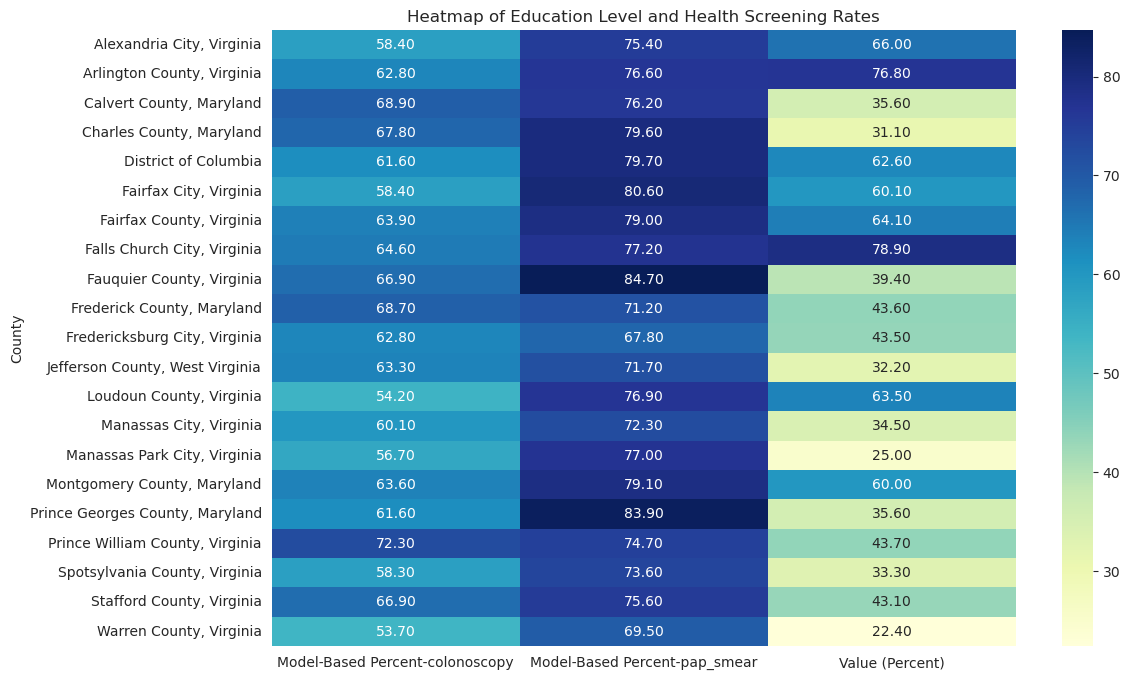

In [10]:
# Heatmap

# Prepare data for heatmap
heatmap_data = df.pivot_table(
    index='County',
    #values=['Value (Percent)', 'Model-Based Percent(3)_x', 'Model-Based Percent(3)_y'],
    values=['Value (Percent)', 'Model-Based Percent-colonoscopy', 'Model-Based Percent-pap_smear'],
    aggfunc='mean'
)

# Create heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Heatmap of Education Level and Health Screening Rates")
plt.show()


In [11]:
# Predictive Modeling

# Define predictors and target
X = df[['Value (Percent)', 'Value (Dollars)']]  # Predictors: Education Level, Income
#y = df['Model-Based Percent(3)_x']  # Target: Health Screening Rate
y = df['Model-Based Percent-colonoscopy']  # Target: Health Screening Rate

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"R^2 Score: {r2_score(y_test, y_pred)}")


Mean Squared Error: 34.44650301099241
R^2 Score: -0.10080860958048077


/home/ryan/miniconda3/envs/NOVA-Economics-on-Individual-Health/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


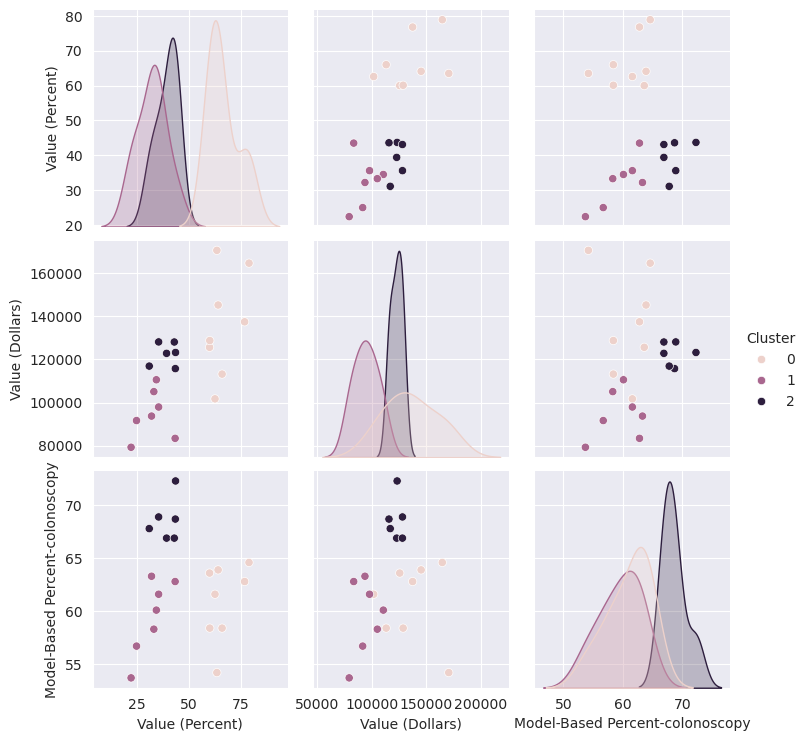

In [12]:
# Clustering Part 2
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select features for clustering
#features = df[['Value (Percent)', 'Value (Dollars)', 'Model-Based Percent(3)_x']]
features = df[['Value (Percent)', 'Value (Dollars)', 'Model-Based Percent-colonoscopy']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Perform KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

# Visualize clusters
sns.pairplot(df, hue='Cluster', vars=['Value (Percent)', 'Value (Dollars)', 'Model-Based Percent-colonoscopy'])
plt.show()


Top 10 Counties by Health Screening Rate:
                            County  Model-Based Percent-colonoscopy
0  Prince William County, Virginia                             72.3
1         Calvert County, Maryland                             68.9
2       Frederick County, Maryland                             68.7
3         Charles County, Maryland                             67.8
4        Fauquier County, Virginia                             66.9
5        Stafford County, Virginia                             66.9
6      Falls Church City, Virginia                             64.6
7         Fairfax County, Virginia                             63.9
8      Montgomery County, Maryland                             63.6
9  Jefferson County, West Virginia                             63.3


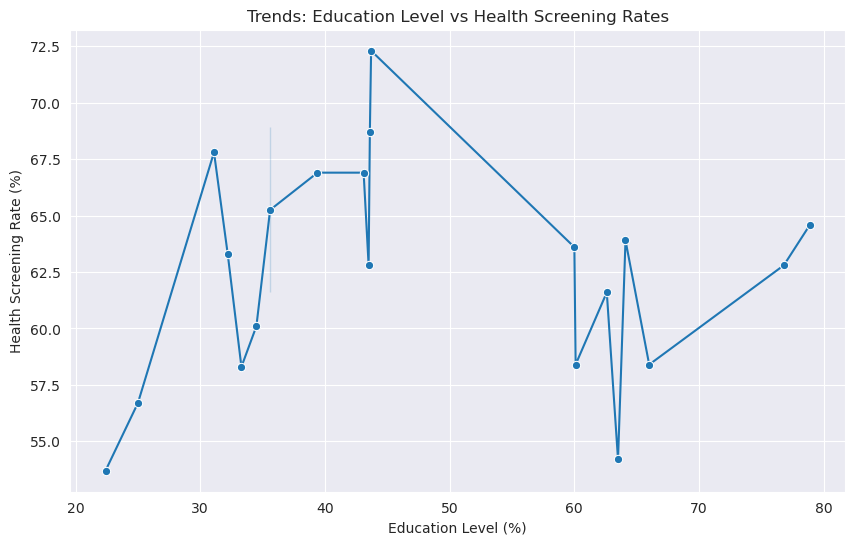

In [13]:
# Rankings and Trends
# Sort by health screening rate
#sorted_df = df.sort_values(by='Model-Based Percent(3)_x', ascending=False)
sorted_df = df.sort_values(by='Model-Based Percent-colonoscopy', ascending=False)

# Display top 10 counties
print("Top 10 Counties by Health Screening Rate:")
#print(sorted_df[['County', 'Model-Based Percent(3)_x']].head(10))
print(sorted_df[['County', 'Model-Based Percent-colonoscopy']].head(10))

# Plot trends
plt.figure(figsize=(10, 6))
#sns.lineplot(data=sorted_df, x='Value (Percent)', y='Model-Based Percent(3)_x', marker='o')
sns.lineplot(data=sorted_df, x='Value (Percent)', y='Model-Based Percent-colonoscopy', marker='o')
plt.title("Trends: Education Level vs Health Screening Rates")
plt.xlabel("Education Level (%)")
plt.ylabel("Health Screening Rate (%)")
plt.show()


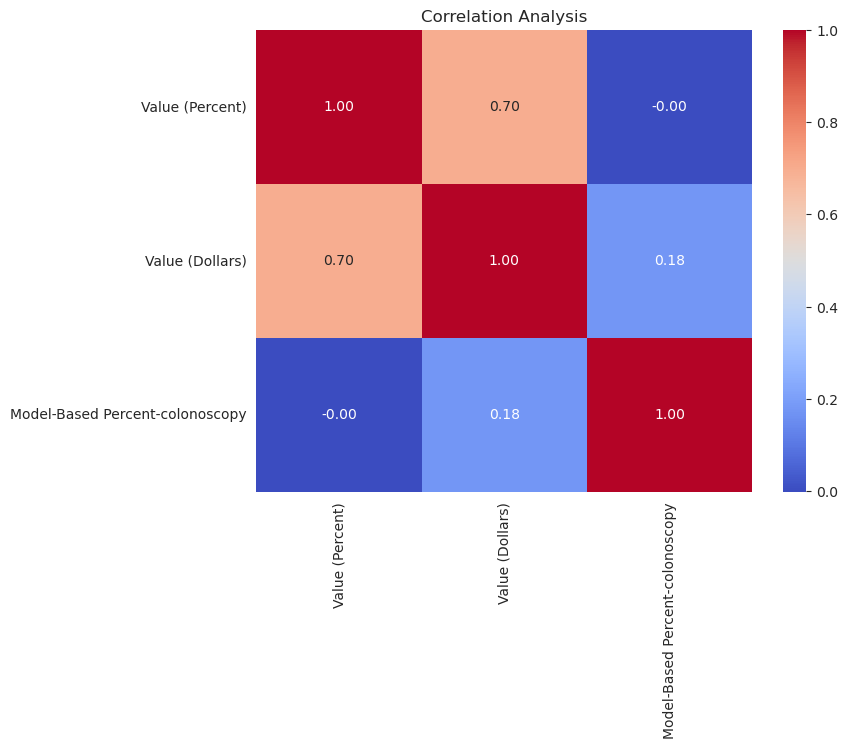

In [14]:
# Correlation Analysis
# Correlation matrix
#correlation_matrix = df[['Value (Percent)', 'Value (Dollars)', 'Model-Based Percent(3)_x']].corr()
correlation_matrix = df[['Value (Percent)', 'Value (Dollars)', 'Model-Based Percent-colonoscopy']].corr()

# Display correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Analysis")
plt.show()
